## **1. Making necessary Imports**

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np

## **2. Loading the Dataset and making appropriate splits on it**

In [2]:
# Intially we will get the "Training" and  "Testing" splits from our original dataset. On top of that, we are also initializing the dataset_info because we will understand
# how to deal and access the values of our dataset.
(train_set, test_set), dataset_info = tfds.load(
    'svhn_cropped', # The 1st argument would be the name of the dataset itself.
    split = ['train', 'test'], # Once we load the required dataset above, now here we mention the number of divisions we want to make on the fetched dataset
    as_supervised=True, # We want to keep it simple, and want to use only the standard format, which is the TUPLE format - (data, its_label) used by most of the models.
                        # If we mention False, the the format we get would be of the "dict" type. That would be {data: data_value, its_label: label}. We can make further
                        # modifications on the dict type format as required
    with_info=True # Now again this attribute directly is related to the "dataset_info" that we initialized in the beginning right next to the train and test attributes.
                   # All the information above the dataset will now be collected, and stored in that variable.
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/73257 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/svhn_cropped/3.0.0.incomplete77EEZ2/svhn_cropped-train.tfrecord*...:   0%|…

Generating test examples...:   0%|          | 0/26032 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/svhn_cropped/3.0.0.incomplete77EEZ2/svhn_cropped-test.tfrecord*...:   0%| …

Generating extra examples...:   0%|          | 0/531131 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/svhn_cropped/3.0.0.incomplete77EEZ2/svhn_cropped-extra.tfrecord*...:   0%|…

Dataset svhn_cropped downloaded and prepared to /root/tensorflow_datasets/svhn_cropped/3.0.0. Subsequent calls will reuse this data.


## **3. Taking a looking at the portion of the Data in Training set**

By default the Data in the splits of the given Dataset, will be in the **Numpy Array** format. The actual images of the dataset, are stored elsewhere. So, to view them, we use the "**take()**" method.



With the help of the "**take()**" method, we can also print additional information about the image. Such as it's shape, Datatype etc.

In [3]:
# The below line will print the image itself
print(train_set.take(1))

# Now, we print certain characteristics of the image
for image, label in train_set.take(1):
  print('check', image) # As we can see below, Each list in the inner most level of the numpy array, is in te format of the current shade of the pixel - [R, G, B]. This one
                        # list alone is the representation of a single pixel.
  print('Shape of the Image: ', image.shape)
  print('Datatype of the Image: ', image.dtype)
  print('Label of the Image: ', label.numpy())
  print('Datatype of the Label: ', label.dtype)

<_TakeDataset element_spec=(TensorSpec(shape=(32, 32, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>
check tf.Tensor(
[[[126 138 136]
  [128 138 137]
  [129 139 138]
  ...
  [ 19  19  19]
  [ 19  21  20]
  [ 19  21  20]]

 [[127 139 137]
  [127 139 137]
  [129 140 138]
  ...
  [ 19  21  20]
  [ 19  21  20]
  [ 17  21  20]]

 [[128 140 139]
  [127 139 138]
  [128 138 137]
  ...
  [ 19  21  20]
  [ 20  22  21]
  [ 17  21  20]]

 ...

 [[ 91  89  96]
  [ 76  75  83]
  [ 69  68  77]
  ...
  [ 94  96  91]
  [ 68  70  65]
  [ 43  45  42]]

 [[ 81  78  87]
  [ 70  68  78]
  [ 66  65  76]
  ...
  [ 99 100  95]
  [ 73  75  70]
  [ 48  48  46]]

 [[ 73  70  79]
  [ 66  64  74]
  [ 66  65  75]
  ...
  [102 106 101]
  [ 78  80  75]
  [ 52  52  50]]], shape=(32, 32, 3), dtype=uint8)
Shape of the Image:  (32, 32, 3)
Datatype of the Image:  <dtype: 'uint8'>
Label of the Image:  4
Datatype of the Label:  <dtype: 'int64'>


## **4. Displaying the image as sample, from the Training set**

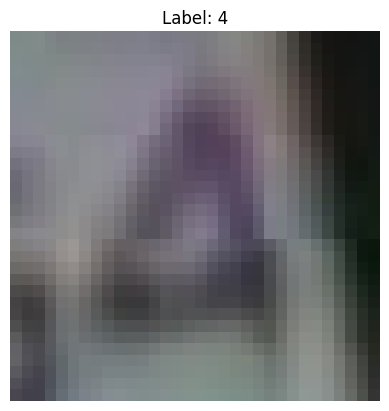

In [4]:
for image, label in train_set.take(1):
  plt.imshow(image.numpy()) # We use the numpy() method because when we fetch the data from tensroflow, we get the data in the datatype called "tensors". Eventhough matplot
                            # handles tensors without any issue, it is also good to convert tensors to numpy, then use it accordingly to prevent compatibility issues.
  plt.title(f"Label: {label.numpy()}")
  plt.axis('off')
  plt.show()

## **5. Pre-processing the pixel value by Normalizing them**

In [5]:
# As we have seen in the output when we executed the 3rd cell, the image datatype is seen to be as "uint8(insigned integer 8 bit)". This format is not suitable and recommended
# to be sent to out network. That is the reason, we will initially have to convert the pixel values to the floating type, which is more favorable for the model and execution.
# Now, once we convert it into the floating type, we now divide the value by 255 to downscale the value. This will squish the value between 0 to 1, which the desirabel approach.
def normalizing_the_pixel_values(image, label):
  return tf.cast(image, tf.float32) / 255, label

# def fetch_labels_from_normalized_data(corresponding_set):
#   populate = []
#   for image, label in corresponding_set:
#     populate.append(label.numpy())
#   return np.array(populate)

# In the below line, we are just telling that each of the pixel value of the image should be passed through the normalizing function, and return the value according to the logic
# mentioned in that respective function. This approach can be accomplished with the help of the "map()" fucntion as used below.
training_set_normalized = train_set.map(normalizing_the_pixel_values)
# training_set_labels = fetch_labels_from_normalized_data(training_set_normalized)
testing_set_normalized = test_set.map(normalizing_the_pixel_values)
# testing_set_labels = fetch_labels_from_normalized_data(testing_set_normalized)


# Now, as we can see below, each pixel value is squished anywhere between 0 and 1
for image, label in training_set_normalized.take(1):
  print(image.numpy())
# print(training_set_labels)


[[[0.49411765 0.5411765  0.53333336]
  [0.5019608  0.5411765  0.5372549 ]
  [0.5058824  0.54509807 0.5411765 ]
  ...
  [0.07450981 0.07450981 0.07450981]
  [0.07450981 0.08235294 0.07843138]
  [0.07450981 0.08235294 0.07843138]]

 [[0.49803922 0.54509807 0.5372549 ]
  [0.49803922 0.54509807 0.5372549 ]
  [0.5058824  0.54901963 0.5411765 ]
  ...
  [0.07450981 0.08235294 0.07843138]
  [0.07450981 0.08235294 0.07843138]
  [0.06666667 0.08235294 0.07843138]]

 [[0.5019608  0.54901963 0.54509807]
  [0.49803922 0.54509807 0.5411765 ]
  [0.5019608  0.5411765  0.5372549 ]
  ...
  [0.07450981 0.08235294 0.07843138]
  [0.07843138 0.08627451 0.08235294]
  [0.06666667 0.08235294 0.07843138]]

 ...

 [[0.35686275 0.34901962 0.3764706 ]
  [0.29803923 0.29411766 0.3254902 ]
  [0.27058825 0.26666668 0.3019608 ]
  ...
  [0.36862746 0.3764706  0.35686275]
  [0.26666668 0.27450982 0.25490198]
  [0.16862746 0.1764706  0.16470589]]

 [[0.31764707 0.30588236 0.34117648]
  [0.27450982 0.26666668 0.30588236]


## **6. Building our Neural Network**

In [6]:
# Now in The CNN layers, each layer will have it's own segment of image that is currently covered under the filter. Now, each neuron of this layer, will get assigned their
# respective parts sequentially as the filter moves. It is NOT like they all the neurons are assigned their parts of the portion of the image at once

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout

model = Sequential()

model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(32, 32, 3), padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(32, (5, 5), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (5, 5), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (5, 5), activation='relu', padding='same'))
model.add(Dropout(0.25))
model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
model.add(Dropout(0.25))
model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
model.add(Dropout(0.25))
# Now, we flatten to the 3D output as we will starting the Fully Connected Layers from here
model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu'))
# We are using Softmax in the final layer because we have multiple classes to which we have to compare the current class with. Also, in classification tasks like these, finding
# the right class through "Probability" of each individual class against the current class, would be a right choice. Softmax handles the outcome based on the probabilities.
model.add(Dense(10, activation='softmax'))

model.compile(
    optimizer='adam',
    # So, when we have fixed defined values, we can still use categorical_crossentropy, but it is way too redundant. Instead, since we have straight defined values, "sparse" which
    # itself defines "individual" or "specific", and our dataset itself is in such a pattern, it is better to use the sparse_categorical_crossentropy.
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        2432      
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        25632     
                                                                 
 batch_normalization_1 (Bat  (None, 16, 16, 32)        1

## **7. Fitting the model with the Data and Labels and printing the History**

In [7]:
history = model.fit(
    training_set_normalized.batch(32),
    epochs=10,
    validation_data=testing_set_normalized.batch(32)
)

print(history.history)

Epoch 1/10
2290/2290 [==============================] - 45s 14ms/step - loss: 0.9627 - accuracy: 0.6801 - val_loss: 0.4610 - val_accuracy: 0.8662
Epoch 2/10
2290/2290 [==============================] - 30s 13ms/step - loss: 0.4923 - accuracy: 0.8515 - val_loss: 0.3975 - val_accuracy: 0.8856
Epoch 3/10
2290/2290 [==============================] - 31s 14ms/step - loss: 0.4335 - accuracy: 0.8692 - val_loss: 0.3467 - val_accuracy: 0.8999
Epoch 4/10
2290/2290 [==============================] - 37s 16ms/step - loss: 0.3953 - accuracy: 0.8843 - val_loss: 0.3354 - val_accuracy: 0.9045
Epoch 5/10
2290/2290 [==============================] - 31s 14ms/step - loss: 0.3718 - accuracy: 0.8897 - val_loss: 0.2874 - val_accuracy: 0.9214
Epoch 6/10
2290/2290 [==============================] - 32s 14ms/step - loss: 0.3604 - accuracy: 0.8955 - val_loss: 0.2848 - val_accuracy: 0.9206
Epoch 7/10
2290/2290 [==============================] - 32s 14ms/step - loss: 0.3401 - accuracy: 0.9008 - val_loss: 0.3288 -

## **8. Plotting the Losses**

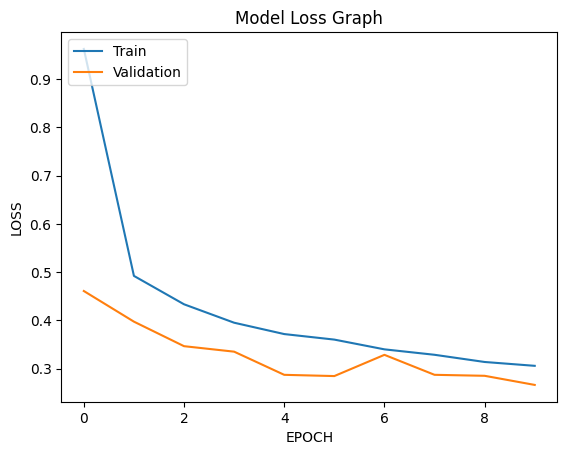

In [8]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss Graph')
plt.ylabel('LOSS')
plt.xlabel('EPOCH')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## **9. Evaluating Our Model**

In [10]:
test_loss, test_accuracy = model.evaluate(testing_set_normalized.batch(32))
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

814/814 [==============================] - 7s 8ms/step - loss: 0.2664 - accuracy: 0.9299
Test Loss: 0.2664335072040558
Test Accuracy: 0.929893970489502
